Example from https://github.com/SciML/DataDrivenDiffEq.jl

In [2]:
using DataDrivenDiffEq
using ModelingToolkit
using OrdinaryDiffEq
using DataDrivenSparse
using LinearAlgebra

# Create a test problem
function lorenz(u, p, t)
    x, y, z = u

    ẋ = 10.0 * (y - x)
    ẏ = x * (28.0 - z) - y
    ż = x * y - (8 / 3) * z
    return [ẋ, ẏ, ż]
end

u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
dt = 0.1
prob = ODEProblem(lorenz, u0, tspan)
sol = solve(prob, Tsit5(), saveat = dt)

"DataDrivenSolution{Float64}"

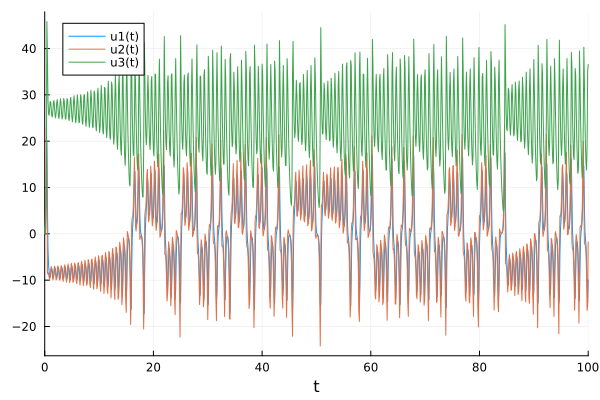

In [10]:
using Plots
plot(sol)

In [12]:

## Start the automatic discovery
ddprob = DataDrivenProblem(sol)

@variables t x(t) y(t) z(t)
u = [x; y; z]
basis = Basis(polynomial_basis(u, 5), u, iv = t)
opt = STLSQ(exp10.(-5:0.1:-1))
ddsol = solve(ddprob, basis, opt, options = DataDrivenCommonOptions(digits = 1))

"DataDrivenSolution{Float64}"

In [3]:
println(get_basis(ddsol))

Model ##Basis#340 with 3 equations
States : x(t) y(t) z(t)
Parameters : 7
Independent variable: t
Equations
Differential(t)(x(t)) = p₁*x(t) + p₂*y(t)
Differential(t)(y(t)) = p₃*x(t) + p₄*y(t) + p₅*x(t)*z(t)
Differential(t)(z(t)) = p₇*z(t) + p₆*x(t)*y(t)



In [8]:
res = solve(ddprob, basis, STLSQ())
println(res) 

"DataDrivenSolution{Float64}" with 3 equations and 7 parameters.
Returncode: Success
Residual sum of squares: 6.077706573167591e-13


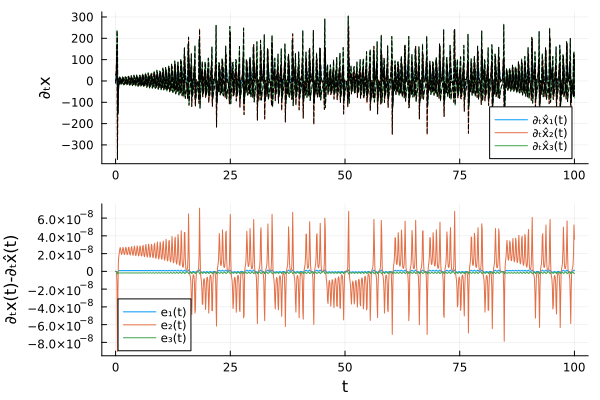

In [11]:
plot(res)